# 1. Basics of Google Colaboratory
https://colab.research.google.com/

Google colab is a free cloud service with Nvidia GPU access for machine learning tasks

You will have a workspace in Linux OS with common commands

In [ ]:
%cd /
!mkdir example
!pwd
!ls 

/
/
bin	 dev	  lib	 mnt	     root  sys		      usr
boot	 etc	  lib32  opt	     run   tensorflow-1.15.2  var
content  example  lib64  proc	     sbin  tmp
datalab  home	  media  python-apt  srv   tools


By default, GPU is turned off. You should activate it in settings: Runtime->Change Runtime type->GPU

In [ ]:
!nvidia-smi

Thu May 26 11:44:58 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Google Drive integration

In [ ]:
from google.colab import drive

some_folder = '/content/drive'
drive.mount(some_folder)
%cd '/content/drive/MyDrive'
!ls

Mounted at /content/drive
/content/drive/MyDrive
 2021.gdraw				 task4_534807.csv
 27.gdoc				'task5_983784 (1).csv'
 Classroom				 task5_983784.csv
'Colab Notebooks'			 WishList.gsheet
'Forma_meropriatie(1).xlsx'		 БытОвая
 Forma_meropriatie.xlsx			'Дневник сна.gsheet'
 geoscan				 Достижения
 lab1_Potapov.pdf			 ИТМО
 Lab_2_Potapov.pdf			 книги
 MT.Lab					'Опросы и таблицы'
 robotix				 Путешествия
'SPFB.RTS-12.18_180901_181231 (1).csv'	'Сканы документов'
 SPFB.RTS-12.18_180901_181231.csv	 фотографии


## Access to datasets


In [ ]:
%cd /content
!cp '/content/drive/MyDrive/Colab Notebooks/AIJ/256_ObjectCategories.tar' /content/256_ObjectCategories.tar
!tar xvf /content/256_ObjectCategories.tar

/content
cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/AIJ/256_ObjectCategories.tar': No such file or directory
tar: /content/256_ObjectCategories.tar: Cannot open: No such file or directory
tar: Error is not recoverable: exiting now


## Limitations
Google Drive has limitations on amount of downloaded files. It is recommended to avoid downloading big datasets from Google Drive if they can be obtained by direct link.

In [ ]:
!wget -N https://s3-us-west-2.amazonaws.com/dl.fbaipublicfiles.com/LVIS/lvis_v1_val.json.zip
!unzip -n lvis_v1_val.json.zip

--2022-05-26 14:26:44--  https://s3-us-west-2.amazonaws.com/dl.fbaipublicfiles.com/LVIS/lvis_v1_val.json.zip
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.245.112
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.245.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64026968 (61M) [application/zip]
Saving to: ‘lvis_v1_val.json.zip’

lvis_v1_val.json.zi 100%[===================>]  61.06M  34.1MB/s    in 1.8s    

2022-05-26 14:26:46 (34.1 MB/s) - ‘lvis_v1_val.json.zip’ saved [64026968/64026968]

Archive:  lvis_v1_val.json.zip
  inflating: lvis_v1_val.json        


# 2.1 Today task
Traffic signs classification

## ML systems pipeline



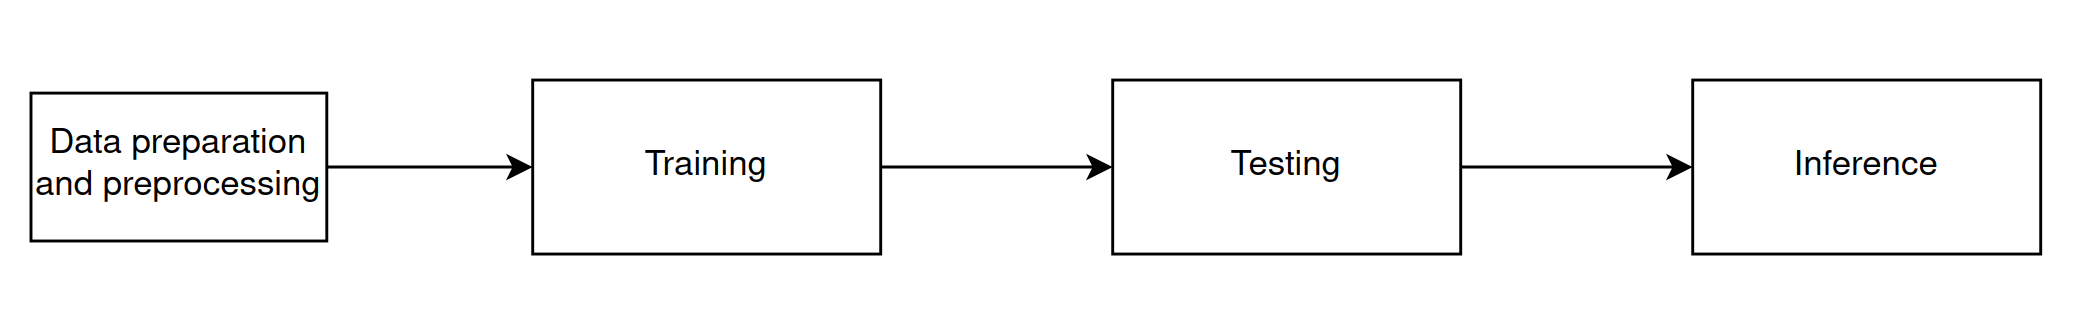

## Supervised learning

We have input data X and corresponding output data Y.
In supervised learning you are to create a function F(x), performing translation $F: X → Y $.

Example: $ S = π R^2$ - Function that translates radius of circle to it's area.

Neural network plays role of this function. A goal of learning is to find parameters of NN, performing translation with minimum error.


## How to formulate image classification task in mathematical language?

Image -> array of pixels with values [0...255]


class label -> class id -> One-Hot encoding (sometimes)

"Stop" -> 5 -> [ 0 0 0 0 0 1 0 0 0 0 ]



## PyTorch
Pytorch is a framework for building deep learning systems.

In a basis PyTorch has automatic differentiating that is crucial to training of NNs.

Maing features of PyTorch:
- data preparation
- common layers of NNs
- Optimization methods (optimizers)
- Loss functions
- Profiling
- deploying and compression methods


## Tensors (in programming)
 - vector - set of numbers
 - Matrix - "table" of numbers (generalization of vector to 2 dimensions)
 - Tensor - generalization of matrix to N dimensions

Tensor in Pytorch - n-dimensional array (like ndarray in Numpy)


In [ ]:
import torch

set_of_n = [1, 4, 38, 28]

a = torch.Tensor([1, 2, 3, 4])
print(a, a.shape)

b = torch.randn((5, 5, 3))
print(b, b.shape)

# access to elements of a tensor
print(b[0, 4, 2]) 

print(a[1:-1])

c = b.numpy() # obtaining numpy array from tensor



tensor([1., 2., 3., 4.]) torch.Size([4])
tensor([[[-1.3121,  0.5215, -0.4814],
         [-0.8426,  0.5547, -0.2280],
         [-0.6773,  0.2785, -1.0891],
         [-0.7275,  0.3806,  1.6229],
         [ 0.0336,  0.8857, -0.3776]],

        [[-0.5191, -0.6089, -1.2570],
         [-0.3005,  0.3053, -0.4622],
         [-0.2924, -2.8840,  1.2934],
         [ 0.8169,  0.8642, -0.4466],
         [ 0.2897, -1.0779, -0.0866]],

        [[ 0.8426,  0.1128, -0.8054],
         [-0.3208, -0.5876, -0.9599],
         [-0.7791, -0.1462, -0.0094],
         [ 0.2334,  0.0153,  0.3132],
         [ 0.3486, -1.3420, -0.4443]],

        [[-0.1829,  1.2731, -0.8881],
         [-1.7067,  3.3327, -0.8363],
         [ 0.0080,  1.0629,  1.1735],
         [-0.2112, -1.2171,  0.5337],
         [ 1.0672, -0.8491,  0.8638]],

        [[-1.0845, -0.3092,  0.5034],
         [ 0.9098, -0.0543,  0.1693],
         [-0.0229,  0.7793, -1.2805],
         [ 0.2192, -0.5022, -0.7303],
         [-0.5790, -0.6239,  0.2868]]])

## 2.2 Data preparation

For each training iteration we need a batch of preprocessed images (float tensor with shape BxHxWxC) and a batch of ground truth labels (integer tensor with shape Bx1).

How to load dataset?
 - load all images and labels im RAM simultaneously
 - use generator that will load images only when they will be used in training




## Dataset downloading

In [ ]:
import os
import gdown
import shutil

def load_dataset():
    # https://drive.google.com/file/d/1KyZjiUJfXoI53Jha1-CH3rma8dDg5-z7/view?usp=sharing
    save_folder = './dataset'

    os.makedirs(save_folder, exist_ok=True)

    print("Downloading data archive...", end=" ")

    id = '1KyZjiUJfXoI53Jha1-CH3rma8dDg5-z7'
    gdown.download(f'https://drive.google.com/uc?id={id}', f"{save_folder}/dataset.zip", quiet=False)

    shutil.unpack_archive(f"{save_folder}/dataset.zip", save_folder)
    print("Done!")
load_dataset()

Downloading...
From: https://drive.google.com/uc?id=1KyZjiUJfXoI53Jha1-CH3rma8dDg5-z7
To: /content/dataset/dataset.zip
100%|██████████| 642M/642M [00:05<00:00, 110MB/s]


Done!


Found 2640 images for Test part
1


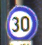

4


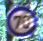

4


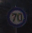

3


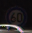

1


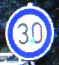

2


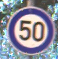

3


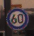

In [ ]:
from torch.utils.data import Dataset
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import torchvision
from google.colab.patches import cv2_imshow
from PIL import Image
import cv2 as cv
import pandas as pd

class OurOwnDataset(Dataset):
    def __init__(self, root_folder, transforms=None, train=True):
        self.root_folder = root_folder
        self.transforms = transforms

        # choose type of dataset (train/test)
        annot_name = 'Train.csv' if train else 'Test.csv'
        self.df = pd.read_csv(f'{root_folder}/{annot_name}')

        # keep only 5 first classes (to reduce size of dataset)
        self.df = self.df[self.df['ClassId'] < 5]

        print(f'Found {len(self.df)} images for {annot_name.split(".")[0]} part')

    def __getitem__(self, i):

        path = os.path.join(self.root_folder, self.df['Path'].iloc[i])
        image = cv.imread(path)
        image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

        if self.transforms:
            image = self.transforms(image)


        label = self.df['ClassId'].iloc[i]
       
        return image, label

    def __len__(self):
        return len(self.df)


dataset = OurOwnDataset('./dataset', train=False)

for i in range(7):
    image, label = dataset.__getitem__(i)
    print(label)
    cv2_imshow(image)


image transformations

In [ ]:
from torchvision.transforms import Compose, ToTensor, Normalize, RandomHorizontalFlip, ColorJitter, ToPILImage, Resize, RandomRotation

target_transforms = Compose([
                             ToPILImage(),
                             # augmentation transformations
                             ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.3),
                             RandomRotation(20),
                             # utility transformations
                             Resize((224, 224)),
                             ToTensor(),
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # "magic numbers" - Imagenet statistics for each channel
])

train_dataset = OurOwnDataset('./dataset', transforms=target_transforms, train=True)
valid_dataset = OurOwnDataset('./dataset', transforms=target_transforms, train=False)


Found 8070 images for Train part
Found 2640 images for Test part


Collecting images to batches

In [ ]:
from torch.utils.data import DataLoader
import torch
batch_size = 16

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=2, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, num_workers=2)


## 2.2 Building of architecture

In 2013 Alexnet architecture won all classic methods in ILSVRC cometition on Imagenet dataset (1.3M images and 1 000 classes)
https://en.wikipedia.org/wiki/AlexNet

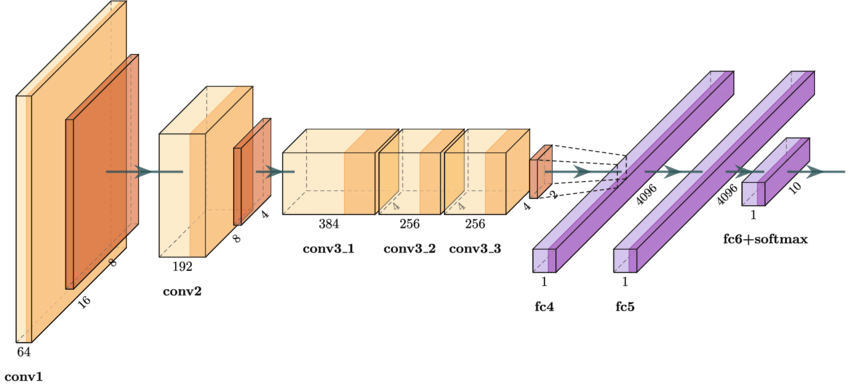

In [ ]:
from torch.nn.modules.pooling import MaxPool2d
from torch import nn
import torch

class OurAlexnet(nn.Module):
    def __init__(self):
        super().__init__()
        self.feature_extractor = nn.Sequential(*[
                                        nn.Conv2d(3, 96, (11, 11), stride=4, padding=1), # Conv2d(input_dimensions, out_dimensions, kernel_shape, stride=1, padding=0)
                                        nn.ReLU(),  # activation function
                                        nn.MaxPool2d((3, 3), stride=2), # MaxPool2d(kernel_shape, stride=1)
                                        nn.Conv2d(96, 256, (5, 5), padding=2),
                                        nn.ReLU(),
                                        nn.MaxPool2d((3, 3), stride=2),
                                        nn.Conv2d(256, 384, (3, 3), padding=1),
                                        nn.ReLU(),
                                        nn.Conv2d(384, 384, (3, 3), padding=1),
                                        nn.ReLU(),
                                        nn.Conv2d(384, 256, (3, 3), padding=1),
                                        nn.ReLU(),
                                        nn.MaxPool2d((3, 3), stride=2),
                                        nn.Flatten() # reshape tensort Batch_size X Channels X Width X Height -> Batch_size X (Channels * Width * Height)
                                        ])
        
        self.classifier = nn.Sequential(*[
                                        nn.Linear(5*5*256, 4096), # Linear(input_dimensions, out_dimensions)
                                        nn.ReLU(),
                                        nn.Dropout(0.5),
                                        nn.Linear(4096, 4096),
                                        nn.ReLU(),
                                        nn.Dropout(0.5),
                                        nn.Linear(4096, 1000), # last out dimension must be equal to number of classes
        ])

    def forward(self, x):
        features = self.feature_extractor(x)
        out = self.classifier(features)
        return out

net = OurAlexnet()
res = net(torch.randn((1, 3, 224, 224)))
res.shape

torch.Size([1, 1000])

## 2.4 Model training
Training process can be divided on two steps:
 1. Initialization of model, optimizer and Loss function object
 2. performing cycle:

```
for epoch in EPOCHS:
    # train stage
    for batch in all batches:
        perform optimization step
    # evaluation stage
    evaluate model
```


### Optimization step

 0. Move tensor to GPU (if necessary) 
 1. calculate model prediction
 2. calculate value of loss function
 3. perform gradient descent step

### model evaluation
 0. change working mode of model
 1. for all image in testing (validation) dataset calculate prediction
 2. calculate permormance matric based on predicted labels and ground-truth ones
 3. If there is no improvement in performance, stop training (optionally)


In [ ]:
### Model usage
# Switching the model to training/prediction mode (changing the behavior of some layers - Dropout, Batch normalization...)
net.train(), net.eval() 
# Moving the model to the video card memory / to the RAM
net.cuda(), net.cpu()
# Model Prediction
result = net(some_input_tensor)

print(net)
# Listing Model Parameters
for param in net.parameters():
    print(param.shape)
################################################################################################

### Using the optimizer
# Initialization
from torch.optim import SGD
optimizer = SGD(params=net.parameters(), lr=1e-3, momentum=0.9)
# Resetting gradients (required before each weight update)
optimizer.zero_grad()
# Optimization step with parameter update
optimizer.step()
################################################################################################

### Usage of Loss Function
# Initialization
from torch.nn import CrossEntropyLoss
CE = CrossEntropyLoss()
# Loss function value calculation, receives a batch of model predictions and a batch of GT labels
# For CrossEntropyLoss, predictions can be One-hot encoded, and GT labels - in the form of a tensor of class indices
loss = CE(predictions, ground_truth)
# loss is an object. to access the numerical value of the loss function, the special method is used 
loss_val = loss.item()

# Backpropagation of error, calculation of gradients
loss.backward()
################################################################################################

### Calculation of performance metric
from sklearn.metrics import accuracy_score
# Here predictions and true labels should be represented as tensors of class indices (in vecor form)
predictions = torch.argmax(predictions, axis=1) # Translation from One-hot encoding to Label encoding
accuracy_metric = accuracy_score(predictions, ground_truth)

probabilities = torch.nn.functional.softmax(raw_predictions) # Obtain class probabilities from logits


NameError: ignored

## 2.3 Using SOTA models pre-trained on Imagenet

In [ ]:
from torchvision.models import mobilenet_v3_small

net = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=False)


classes = len(dataset.df['ClassId'].unique())
print(classes, ' classes in dataset')

net.classifier[-1] = torch.nn.Linear(net.classifier[-1].in_features, classes)


Downloading: "https://github.com/pytorch/vision/archive/v0.10.0.zip" to /root/.cache/torch/hub/v0.10.0.zip


5  classes in dataset


# Training

In [ ]:
from torchvision.transforms import Compose, ToTensor, Normalize, RandomHorizontalFlip, ColorJitter, ToPILImage, Resize, RandomRotation
from torch.utils.data import DataLoader
import torch

target_transforms = Compose([
                             ToPILImage(),
                             Resize((224, 224)),
                             ToTensor(),
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]), # "магические числа" - Imagenet статистика для каждого канала (mean - среднее, std - СКО)
])

train_dataset = OurOwnDataset('./dataset', transforms=target_transforms, train=True)
valid_dataset = OurOwnDataset('./dataset', transforms=target_transforms, train=False)

batch_size = 16

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, num_workers=2, shuffle=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, num_workers=2)

# Model, optimizer, criterion initialization
#################################################

net = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2', pretrained=False)


classes = len(dataset.df['ClassId'].unique())
print(classes, ' classes in dataset')

net.classifier[-1] = torch.nn.Linear(net.classifier[-1].in_features, classes)

### Using the optimizer
# Initialization
from torch.optim import SGD
optimizer = SGD(params=net.parameters(), lr=1e-3, momentum=0.9)
### Usage of criterion (for calculating loss)
# Initialization
from torch.nn import CrossEntropyLoss
CE = CrossEntropyLoss()
accuracy_metric =torch.Tensor([])

#################################################

EPOCHS = 10

for epoch in range(EPOCHS):

    # train stage
    net.train()
    print("Train stage")
    total_loss = 0
    image_number = 0
    #############################################
    for images, gt_labels in train_dataloader:
        # Implement optimization step
        net.cuda()
        images = images.cuda()
        gt_labels = gt_labels.cuda()
        # Optimization step with parameter update
        
        predictions = net(images)
        loss = CE(predictions, gt_labels)
        total_loss += loss.item()

        optimizer.zero_grad()

        image_number += 1
        #print("train: ", image_number)

        loss.backward()
        optimizer.step()
    #############################################


    # validation stage
    net.eval()
    print("Validation stage")
    image_number = 0
    #############################################
    with torch.no_grad(): # Using this wrapper prevents gradient calculation
        correct = 0
        total = len(valid_dataloader.dataset)
        for images, gt_labels in valid_dataloader:
            # Implement validation here
            net.cuda()
            images = images.cuda()
            gt_labels = gt_labels.cuda()
            predictions = net(images)
            predictions = torch.argmax(predictions, axis=1)
            correct += sum(predictions == gt_labels)
            image_number += 1
            #print("Validation: ", image_number)
        accuracy = correct / total
    #############################################
    
    
    #  Print info about training process: current epoch, accuracy, sum/avg loss value
    #############################################
    print(f'Epoch: {epoch}, Loss: {(total_loss / len(train_dataloader)):.3f}, accuracy: {accuracy}')
    #############################################

    
    # (optionally) stop training process if there is no improvement

Found 8070 images for Train part
Found 2640 images for Test part


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


5  classes in dataset
Train stage
Validation stage
Epoch: 0, Loss: 1.339, accuracy: 0.3700757324695587
Train stage
Validation stage
Epoch: 1, Loss: 1.185, accuracy: 0.385606050491333
Train stage
Validation stage
Epoch: 2, Loss: 0.823, accuracy: 0.7143939137458801
Train stage
Validation stage
Epoch: 3, Loss: 0.355, accuracy: 0.8234848380088806
Train stage
Validation stage
Epoch: 4, Loss: 0.157, accuracy: 0.8977272510528564
Train stage
Validation stage
Epoch: 5, Loss: 0.090, accuracy: 0.939393937587738
Train stage
Validation stage
Epoch: 6, Loss: 0.057, accuracy: 0.9549242258071899
Train stage
Validation stage
Epoch: 7, Loss: 0.053, accuracy: 0.9534090757369995
Train stage
Validation stage
Epoch: 8, Loss: 0.029, accuracy: 0.9636363387107849
Train stage
Validation stage
Epoch: 9, Loss: 0.023, accuracy: 0.9643939137458801


## 2.5 Saving and loading models

In [ ]:
net.cuda()
# We save not the model, but only tensors of parameters
torch.save(net.state_dict(), '/content/drive/MyDrive/Colab Notebooks/dict_checkpoint.pth')

# load dictionary with pairs "parameter name": parameter_tensor
states = torch.load('/content/drive/MyDrive/Colab Notebooks/dict_checkpoint.pth')

# init architecture
net2 = torch.hub.load('pytorch/vision:v0.10.0', 'mobilenet_v2')
net2.classifier[-1] = nn.Linear(net.classifier[-1].in_features, classes)
# change default values with our trained ones
net2.load_state_dict(states)

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


<All keys matched successfully>

## Model inference
For each input image:
  1. Make transformations
  2. Increase dimension (create a batch from one image)
  3. Move to GPU (if needed)
  4. Make a prediction
  5. Post-process of the model prediction (find the index with the maximum response, determine the probability of belonging to a class)


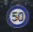

Probability:  0.5128547549247742 
Predicted class:  2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
net.eval()
# Write a function that performs inference on a given image with trained model
def predict(image):
    #############################################
    
    image = target_transforms(image)
    prediction = net2(image.unsqueeze(0))    
    predictions = torch.argmax(prediction, axis=1)

    probability = torch.nn.functional.softmax(prediction) # Obtain class probabilities from logits
    prediction = probability[0][predictions]
    return prediction, predictions.numpy()[0]
    
    # should return class index and it's probability
    #############################################

some_image, gt_label = dataset.__getitem__(100)
#print(type(some_image), some_image.shape)
cv2_imshow(some_image)
prediction, probability = predict(some_image)
print("Probability: ", prediction[0].item(), "" )
print("Predicted class: ", probability)

## Tasks
 - create a model that consists of pretrained feature extractor and your custom classification head


In [ ]:
dumb_layer = nn.Identity()
# you can replace parts of a model by another torch.nn.Module modules or stack some layers above existing model

# Do it here


 - create your own model with few layers performing classification on MNIST dataset

Documentation of layers in PyTorch https://pytorch.org/docs/stable/nn.html
Use convolutional, linear layers, ReLU between layers as activation function.  

In [ ]:
mnist_train_dataset = torchvision.datasets.MNIST('./', train=True)
mnist_test_dataset = torchvision.datasets.MNIST('./', train=False)

In [ ]:
# Do it here

 - apply geometric and color transformations to an image and visualize it
 
 https://pytorch.org/vision/stable/transforms.html

In [ ]:
!wget https://funcakes.com/content/uploads/2021/02/Red-Velvet-Cake-with-Fruit-960x720-c-default.jpg

just_image = cv.imread('Red-Velvet-Cake-with-Fruit-960x720-c-default.jpg')
cv2_imshow(just_image)

In [ ]:
# Do it here
a = torch.Tensor([1, 2, 3])
a_numpy = a.numpy() # Converting a tensor to a numpy array for visualization

A little about additional features
  - Logging (WandB, Tensorboard)
  - Hyperparameter optimization (Optuna)
  - Wrappers (Lightning, Catalyst)
  - frameworks for specific tasks: MMlab, Detectron2
  - PyTorch analogs: Tensorflow, Jax